In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [3]:
train = pd.read_excel('new_data.xlsx', error_bad_lines=False)
train.head(70)

,Name,Director,Total Vote,Year,IMDB score,MC Score,Genre,Column1,_1
0,The Shawshank Redemption,Frank Darabont,2318407,1994,9.3,80.0,Drama,NaN,NaN
1,The Dark Knight,Christopher Nolan,2280614,2008,9.0,84.0,Action,Crime,Drama
2,Inception,Christopher Nolan,2043823,2010,8.8,74.0,Action,Adventure,Sci-Fi
3,Fight Club,David Fincher,1836556,1999,8.8,66.0,Drama,NaN,NaN
4,Pulp Fiction,Quentin Tarantino,1808737,1994,8.9,94.0,Crime,Drama,NaN
...,...,...,...,...,...,...,...,...,...
65,Gone Girl,David Fincher,849896,2014,8.1,79.0,Drama,Mystery,Thriller
66,No Country for Old Men,Ethan Coen,847206,2007,8.1,91.0,Crime,Drama,Thriller
67,A Beautiful Mind,Ron Howard,840842,2001,8.2,72.0,Biography,Drama,NaN
68,The Hunger Games,Gary Ross,839757,2012,7.2,68.0,Action,Adventure,Sci-Fi


In [8]:
train.Director.str.count("Nolan").sum()

10

In [16]:
dircount = train.Director.value_counts()
print(dircount)

Steven Spielberg        21
Tim Burton              13
Ridley Scott            12
Michael Bay             11
Martin Scorsese         11
                        ..
Chris Weitz              1
Juan José Campanella     1
Bob Persichetti          1
J.B. Rogers              1
Neil Jordan              1
Name: Director, Length: 445, dtype: int64


In [15]:
genrecount = train.Genre.value_counts()
print(genrecount)

Action                 385
Drama                  121
Comedy                 116
Adventure               73
Animation               70
Crime                   69
Biography               51
Comedy                  35
Drama                   27
Horror                  27
Mystery                  8
Horror                   6
Western                  3
Fantasy                  3
Family                   2
Sci-Fi                   2
Musical                  1
Romance                  1
Name: Genre, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000194E8A5C970>,
      dtype=object)

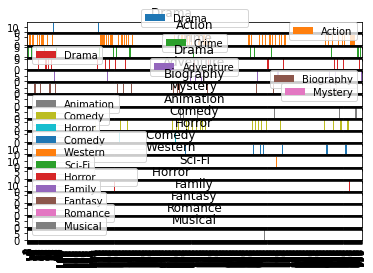

In [21]:
train.Genre.apply(pd.value_counts).plot(kind='bar', subplots=True)

In [17]:
yearcount = train.Year.value_counts()
print(yearcount)

2011    55
2013    54
2012    50
2008    48
2014    46
        ..
1967     1
1969     1
1971     1
1972     1
1936     1
Name: Year, Length: 71, dtype: int64


In [4]:
print(len(train))

1000


In [5]:
train.isnull().sum().max()

278

In [6]:
train.describe()

,Total Vote,Year,IMDB score,MC Score
count,1.000000e+03,1000.000000,1000.000000,992.000000
mean,4.016538e+05,2004.020000,7.342600,66.532258
std,2.704351e+05,12.865346,0.743181,15.799608
min,1.858160e+05,1936.000000,3.800000,23.000000
25%,2.293805e+05,2000.000000,6.900000,55.000000
50%,3.070995e+05,2007.000000,7.400000,67.000000
75%,4.676580e+05,2013.000000,7.900000,79.000000
max,2.318407e+06,2020.000000,9.300000,100.000000


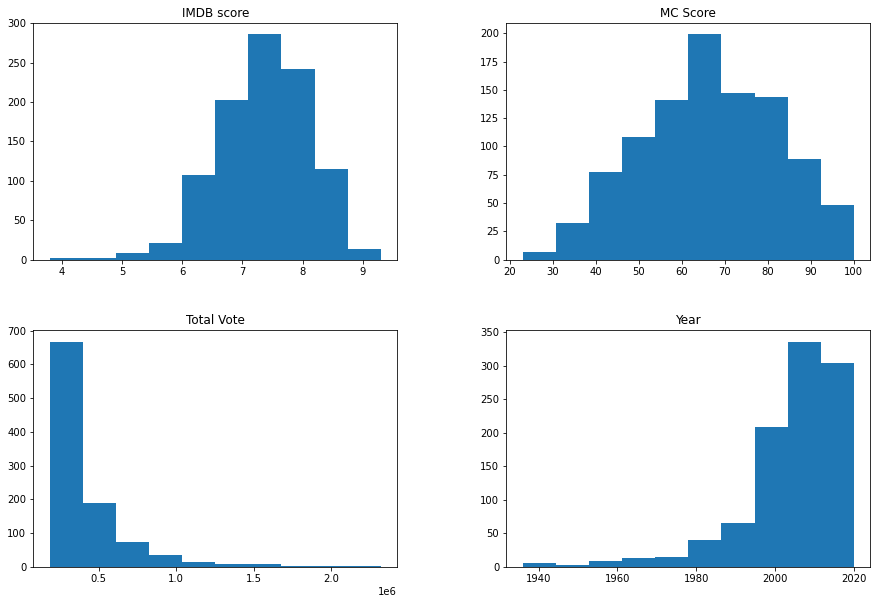

In [7]:
train.hist(bins=10,figsize=(15,10),grid= False);

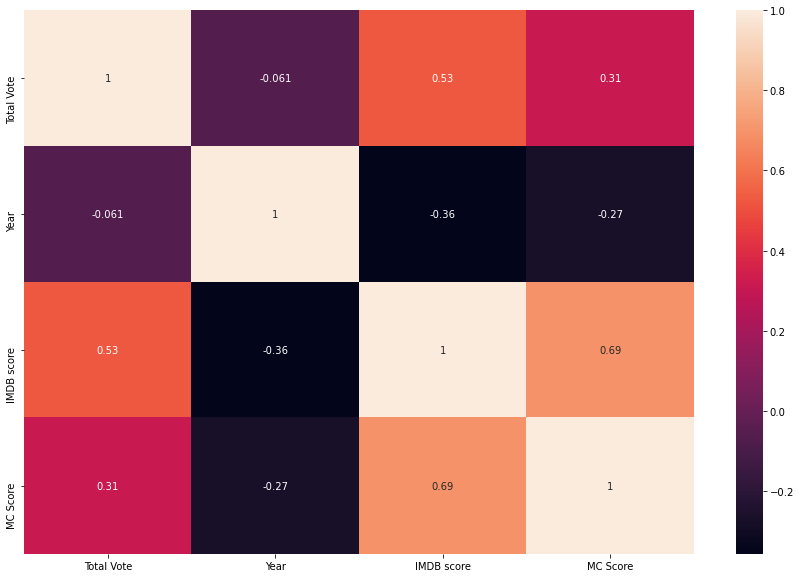

In [8]:
corr = train.corr();
plt.figure(figsize=(15,10));
ax = sns.heatmap(corr, annot=True);